In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing

# Reading the collected data 

In [2]:
Bank=pd.read_csv('Bank.csv')

In [3]:
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
Bank.shape

(11162, 17)

# Data Pre-processing

# Feature Engineering and Reduction

- handling missing value,outliner detection and handling,encoding scaling all comes under feature engineering.

In [5]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11124 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


# Handling Missing Values

In [6]:
Bank.isna().sum()

age          38
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [7]:
Bank.groupby(['job','marital','education'])['age'].mean()


job      marital   education
admin.   divorced  primary      42.500000
                   secondary    43.201220
                   tertiary     37.000000
                   unknown      50.000000
         married   primary      50.000000
                                  ...    
unknown  married   tertiary     49.400000
                   unknown      54.071429
         single    secondary    33.833333
                   tertiary     38.250000
                   unknown      37.555556
Name: age, Length: 132, dtype: float64

In [8]:
Bank['age']=Bank['age'].fillna(Bank.groupby(['job','marital','education'])['age'].transform('mean'))
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [9]:
Bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
# Split the categorical and continuos features
categorical_coln = Bank.select_dtypes('object')
numerical_coln = Bank.select_dtypes('number')

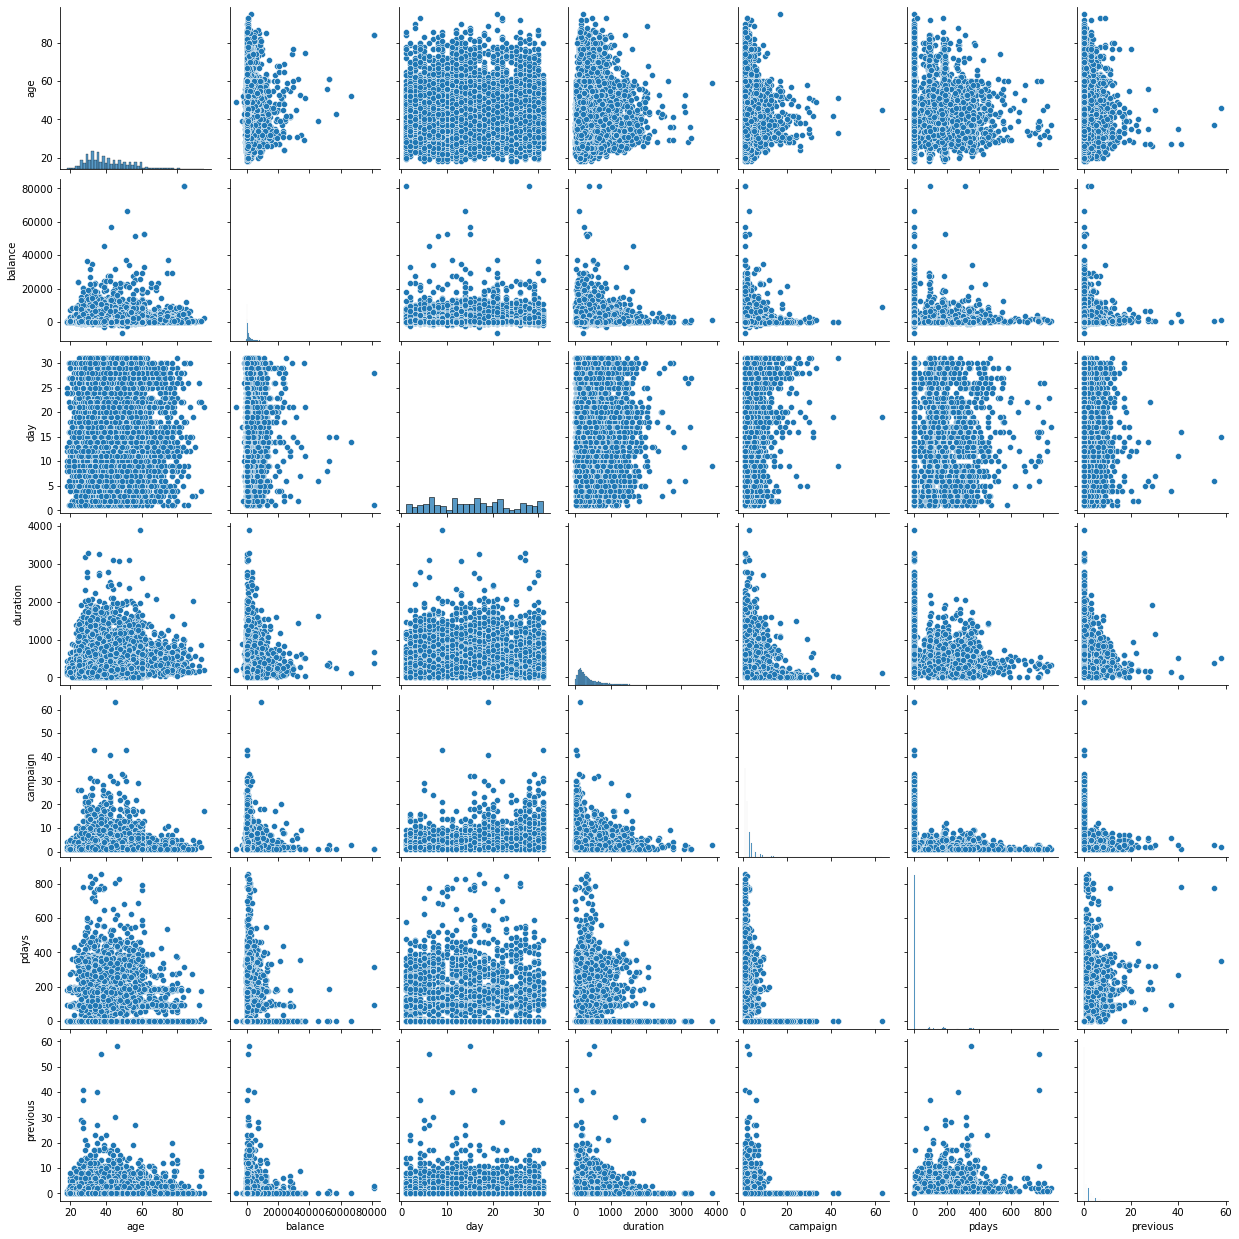

In [11]:
#Bivarite plot
sns.pairplot(numerical_coln)

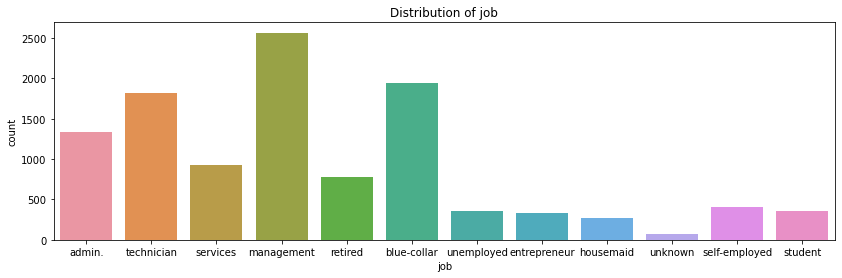

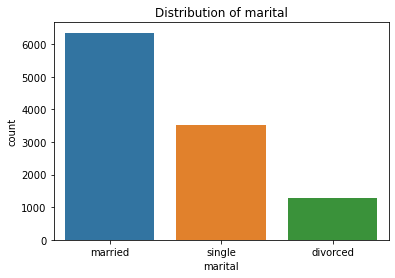

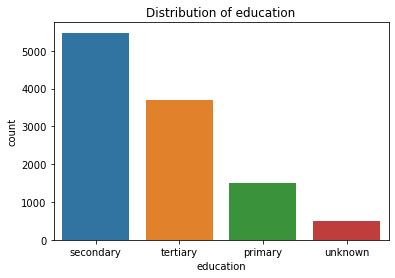

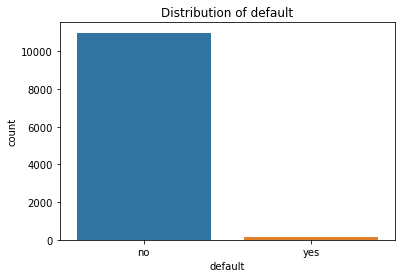

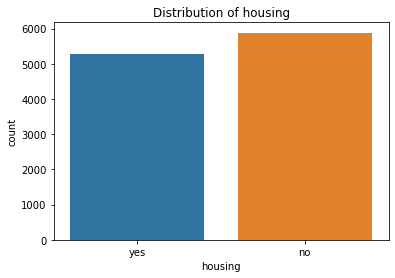

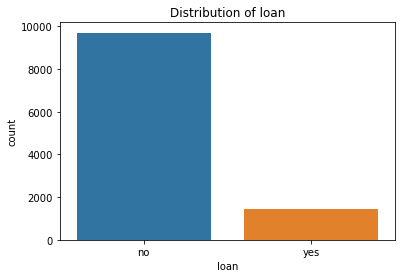

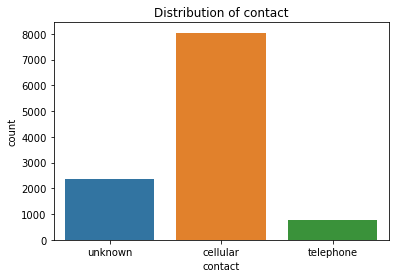

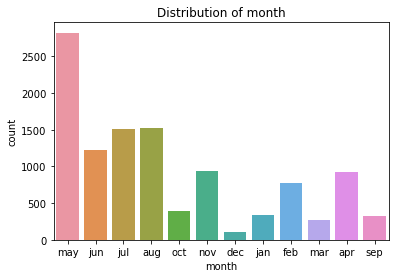

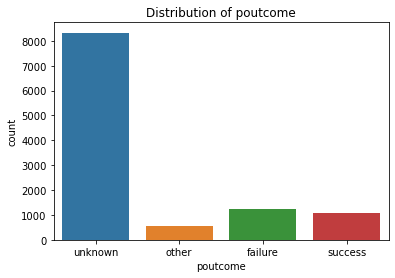

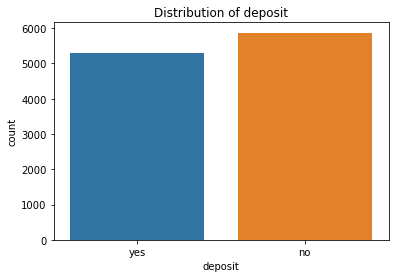

In [12]:
#Univariate plot
plt.figure(figsize=[14,4])
for i in categorical_coln:
    sns.countplot(Bank[i])
    plt.title('Distribution of {}'.format(i))
    plt.show()

In [13]:
for NAN in categorical_coln:
    print('The count of unique values in {} is\n{}  '.format(NAN,categorical_coln[NAN].value_counts()))
    print('------------------------------------')

The count of unique values in job is
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64  
------------------------------------
The count of unique values in marital is
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64  
------------------------------------
The count of unique values in education is
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64  
------------------------------------
The count of unique values in default is
no     10994
yes      168
Name: default, dtype: int64  
------------------------------------
The count of unique values in housing is
no     5881
yes    5281
Name: housing, dtype: int64  
------------------------------------
The count of unique values 


## In the dataset the missing values are given as Unknown values

- There are 70 unknown values in Job
- There are 497 unknown values in Education
- There are 2346 unknown values in contact 
- There are 8326 unknown values in poutcome 

<AxesSubplot:xlabel='job', ylabel='count'>

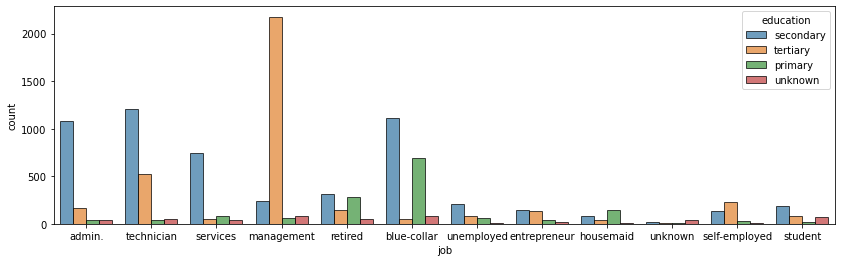

In [14]:
plt.figure(figsize=[14,4])
sns.countplot(x='job',hue='education',edgecolor="black", alpha=0.7, data=Bank)

<AxesSubplot:xlabel='education', ylabel='count'>

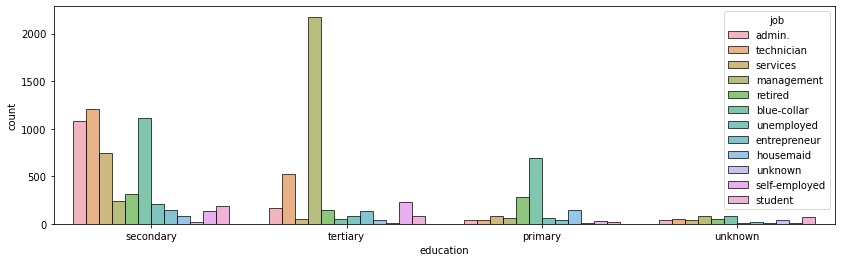

In [15]:
plt.figure(figsize=[14,4])
sns.countplot(x='education',hue='job',edgecolor="black", alpha=0.7, data=Bank)

In [16]:
Bank.groupby('job')['education'].value_counts()


job            education
admin.         secondary    1084
               tertiary      168
               primary        42
               unknown        40
blue-collar    secondary    1116
               primary       694
               unknown        86
               tertiary       48
entrepreneur   secondary     141
               tertiary      132
               primary        41
               unknown        14
housemaid      primary       144
               secondary      78
               tertiary       43
               unknown         9
management     tertiary     2178
               secondary     238
               unknown        84
               primary        66
retired        secondary     314
               primary       277
               tertiary      140
               unknown        47
self-employed  tertiary      230
               secondary     136
               primary        28
               unknown        11
services       secondary     746
               pri

In [17]:
job=list(Bank['job'].unique())
job.remove('unknown')
print(Bank['education'].value_counts())
for j in job:
    k=Bank[Bank['job']== j][['education']].mode()
    Bank.loc[(Bank['job'] == j)&(Bank['education']=='unknown'), "education"] = k['education'].iloc[0]
Bank['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64


secondary    5830
tertiary     3784
primary      1509
unknown        39
Name: education, dtype: int64

In [18]:
Bank.groupby('job')['education'].value_counts()


job            education
admin.         secondary    1124
               tertiary      168
               primary        42
blue-collar    secondary    1202
               primary       694
               tertiary       48
entrepreneur   secondary     155
               tertiary      132
               primary        41
housemaid      primary       153
               secondary      78
               tertiary       43
management     tertiary     2262
               secondary     238
               primary        66
retired        secondary     361
               primary       277
               tertiary      140
self-employed  tertiary      241
               secondary     136
               primary        28
services       secondary     787
               primary        83
               tertiary       53
student        secondary     256
               tertiary       83
               primary        21
technician     secondary    1261
               tertiary      521
               pri

In [19]:
edu=list(Bank['education'].unique())
edu.remove('unknown')
print(Bank['job'].value_counts())
for j in edu:
    k=Bank[Bank['education']== j][['job']].mode()
    Bank.loc[(Bank['education'] == j)&(Bank['job']=='unknown'), "job"] = k['job'].iloc[0]
Bank['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64


management       2575
blue-collar      1951
technician       1838
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            39
Name: job, dtype: int64

- Replaced most of the Job and Education columns using mode function.
There are only total 39 unknown values in common in both the columns

In [20]:
ed=Bank[Bank['education']=='unknown']
i=ed.index
Bank.drop(i,inplace=True)
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


Removed the unknown values in job and education

## Outliners detection and Handling

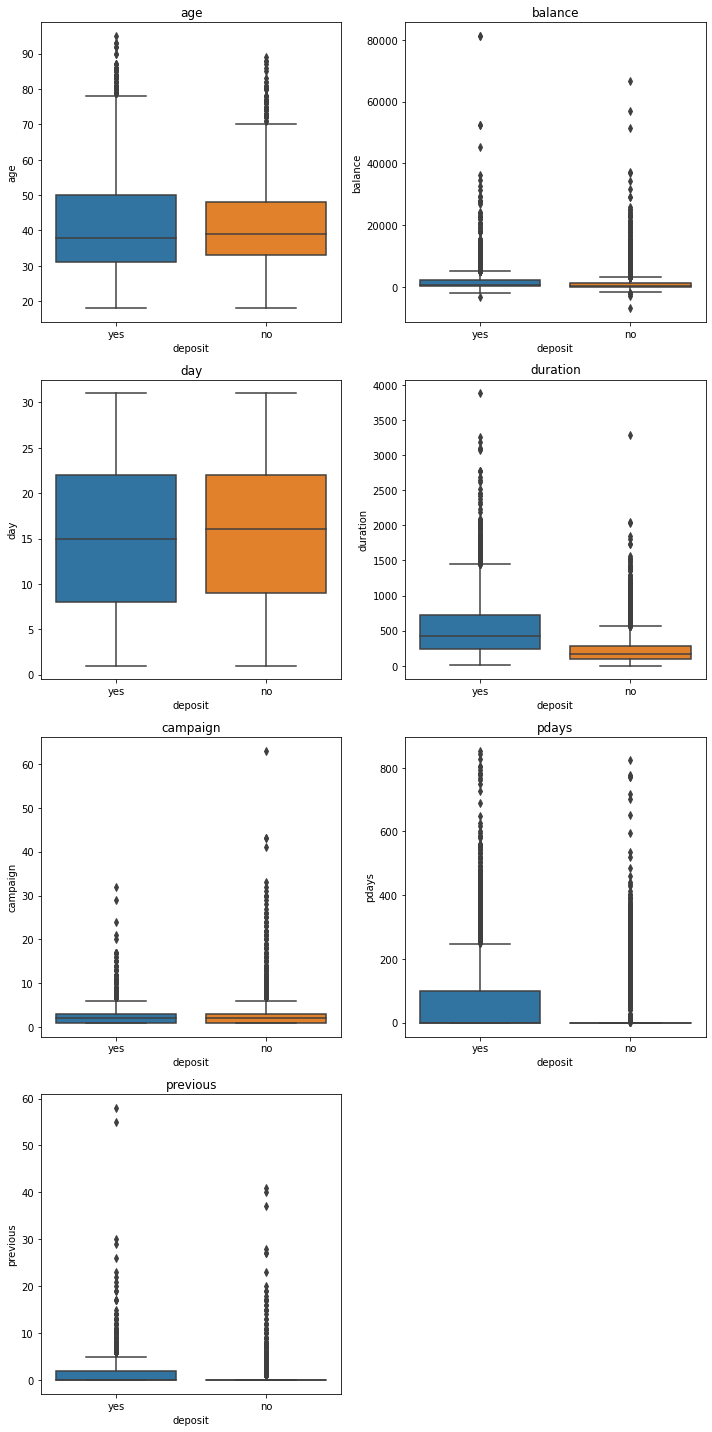

In [21]:
  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(10,20))

for i in numerical_coln:
    plt.subplot(4, 2, c)
    plt.title('{}'.format(i))
    
    sns.boxplot(x=Bank['deposit'],y = numerical_coln[i])
    c = c + 1

plt.tight_layout()
plt.show()

In [22]:
Bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11123.000000,11123.000000,11123.000000,11123.000000,11123.000000,11123.000000,11123.000000
mean,41.197571,1526.296593,15.655668,372.150319,2.506069,51.340376,0.834038
std,11.892501,3221.911131,8.417498,347.228981,2.719129,108.649765,2.294917
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1707.000000,22.000000,496.000000,3.000000,23.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


- We could find that the Even if there are outliners in age column, the maximum age  95 and min age  18  can be an expected age according to the domain knowledge. Customers of 18 yrs to 95 yrs can have a term deposit. Hence we are not removing the outliners of Age.
-  we can ignore the outliners of Balance as it can vary according to the cutomers according to the domain knowledge.

- Since it it a very large dataset, it is likely to get more outliners. So instead of dropping all the outliners we have calculated the quantile and only dropped outliners with huge difference in previous and campaign column

<AxesSubplot:xlabel='count', ylabel='previous'>

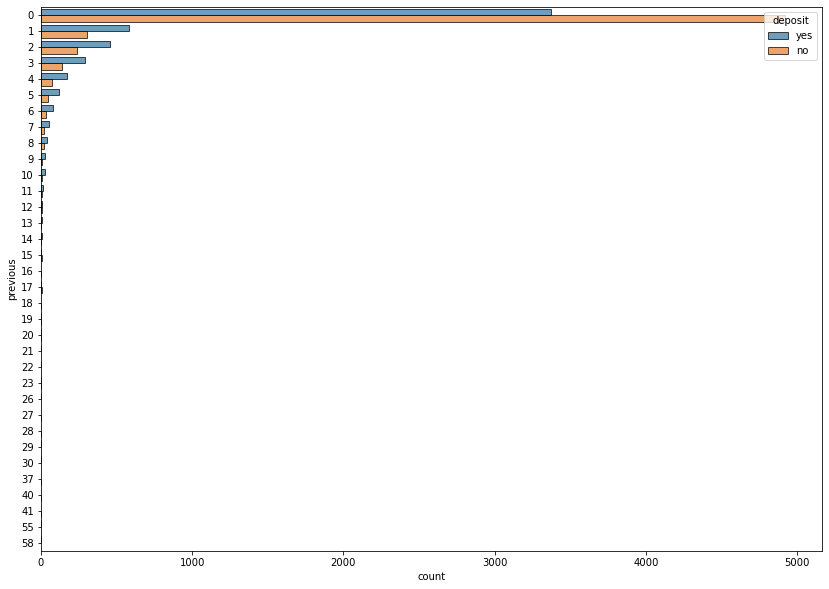

In [23]:
plt.figure(figsize=[14,10])
sns.countplot(y='previous',hue='deposit',edgecolor="black", alpha=0.7, data=Bank)

In [24]:
maxi=Bank['previous'].quantile(0.995)
maxi

13.0

In [25]:
d=Bank[Bank['previous']>maxi]
ind=d.index

In [26]:
Bank.drop(ind, inplace=True)
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


<AxesSubplot:xlabel='count', ylabel='previous'>

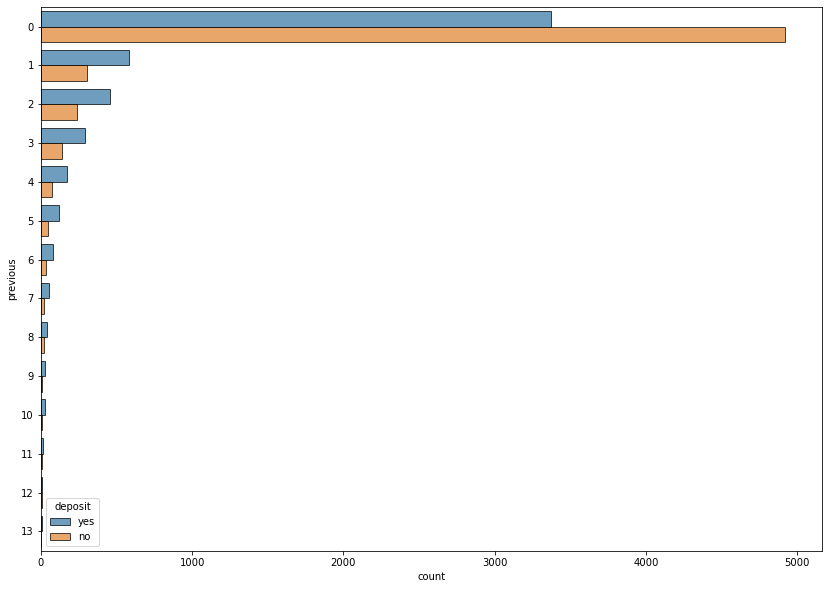

In [27]:
plt.figure(figsize=[14,10])
sns.countplot(y='previous',hue='deposit',edgecolor="black", alpha=0.7, data=Bank)

<AxesSubplot:xlabel='count', ylabel='campaign'>

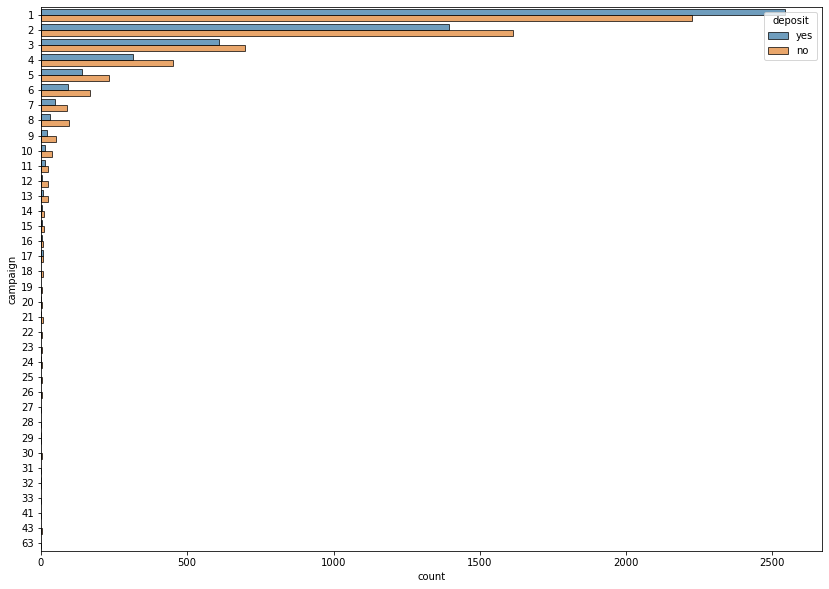

In [28]:
plt.figure(figsize=[14,10])
sns.countplot(y='campaign',hue='deposit',edgecolor="black", alpha=0.7, data=Bank)

In [29]:
maxi=Bank['campaign'].quantile(0.995)
maxi

18.0

In [30]:
d=Bank[Bank['campaign']>maxi]
ind=d.index
print(ind)

Int64Index([  563,   618,  1217,  4587,  4912,  5311,  5655,  6052,  6435,
             6644,  6798,  6820,  6904,  6927,  6939,  7024,  7139,  7237,
             7240,  7307,  7587,  7635,  7750,  7763,  7997,  8367,  8408,
             8423,  8428,  8451,  8463,  8541,  8604,  8618,  8806,  9241,
             9255,  9265,  9269,  9388,  9640,  9683, 10096, 10293, 10352,
            10372, 10483, 10771, 10865, 10932, 10960, 10993],
           dtype='int64')


In [31]:
Bank.drop(ind, inplace=True)
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


<AxesSubplot:xlabel='count', ylabel='campaign'>

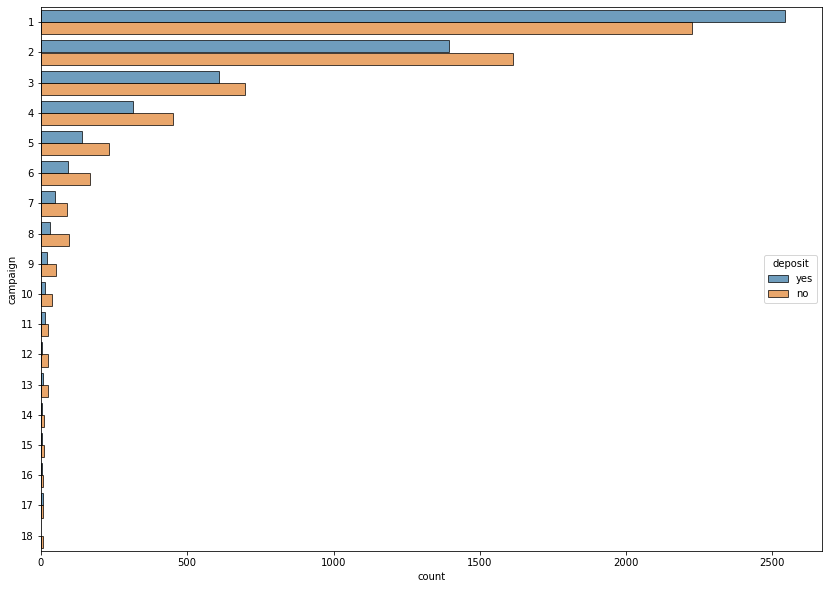

In [32]:
plt.figure(figsize=[14,10])
sns.countplot(y='campaign',hue='deposit',edgecolor="black", alpha=0.7, data=Bank)

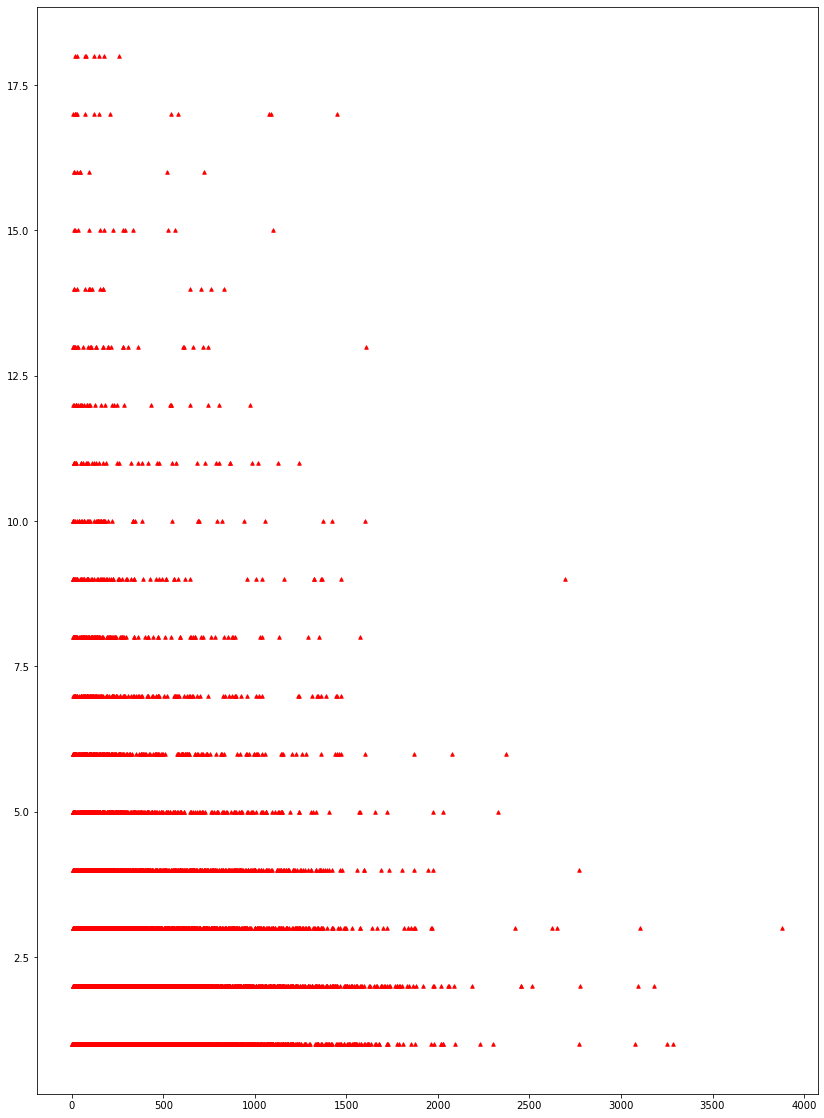

In [33]:
plt.figure(figsize=[14,20])
plt.scatter(Bank['duration'],Bank['campaign'],s=12, c='red',marker='^')


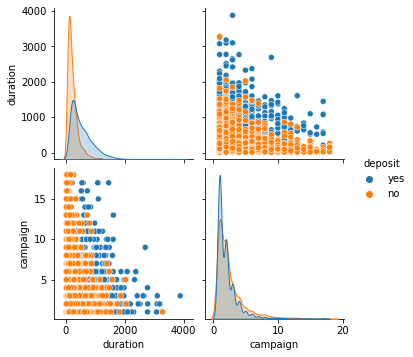

In [34]:
Slice=Bank[['duration','campaign','deposit']]
sns.pairplot(Slice, hue='deposit')

As the duration increases, the customers are likely to deposit. Hence we are not removing all the outliners 

In [35]:
maxi=Bank['duration'].quantile(0.999)
maxi

2652.232000000018

In [36]:
d=Bank[Bank['duration']>maxi]
ind=d.index
print(ind)

Int64Index([153, 261, 271, 306, 358, 883, 1106, 1179, 1351, 4364, 4878, 7198], dtype='int64')


In [37]:
Bank.drop(ind, inplace=True)
Bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39.0,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32.0,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43.0,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


## Feature reduction

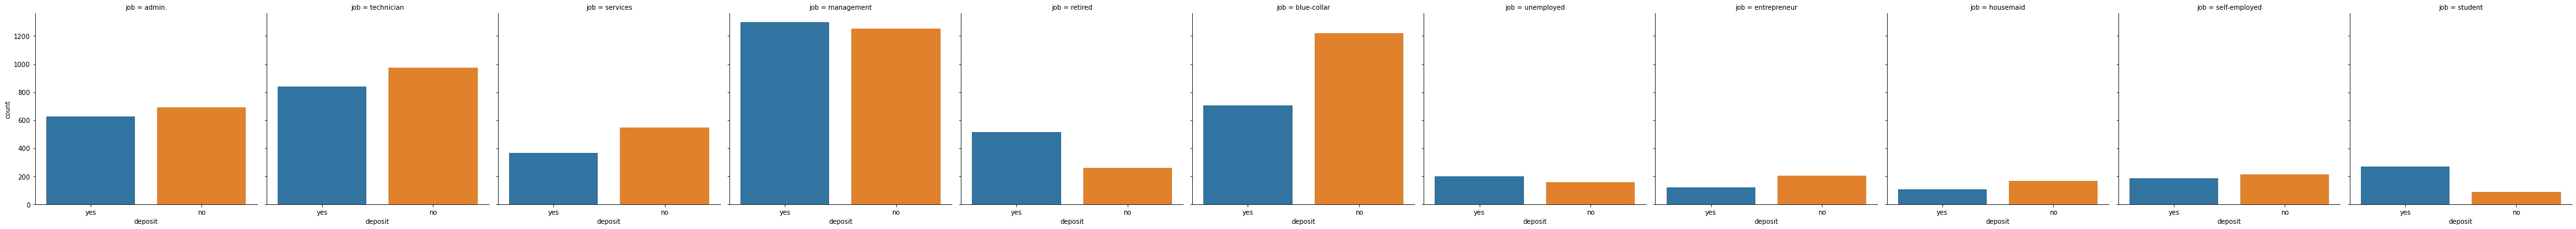

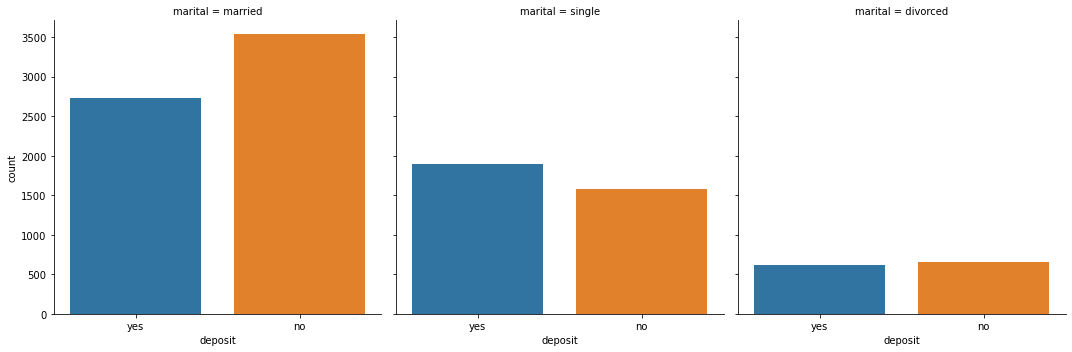

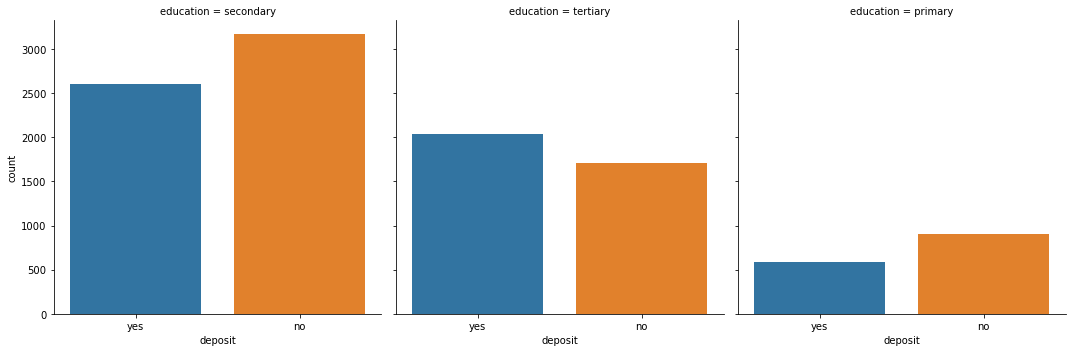

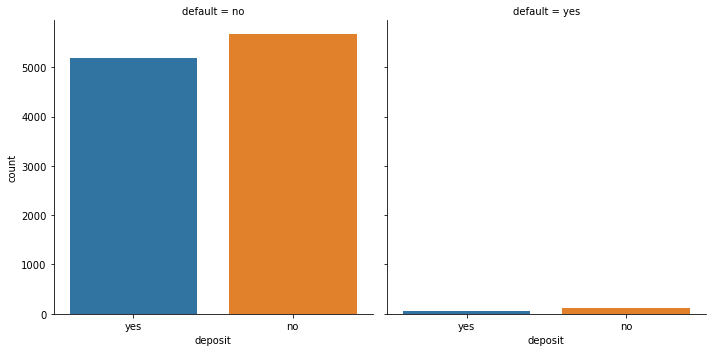

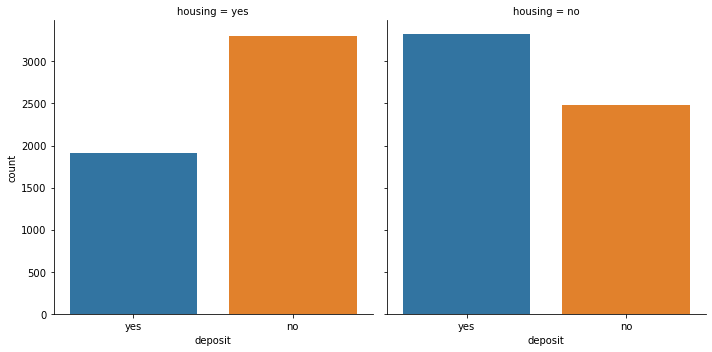

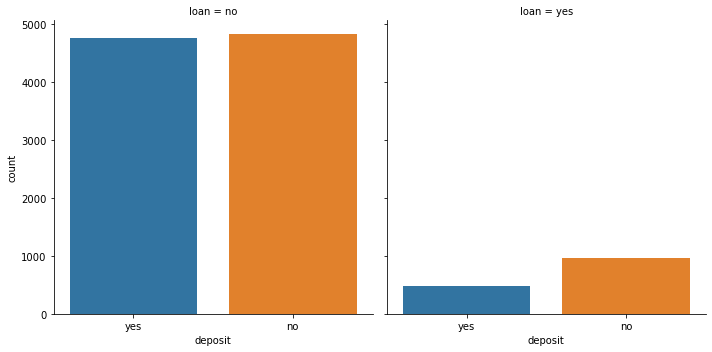

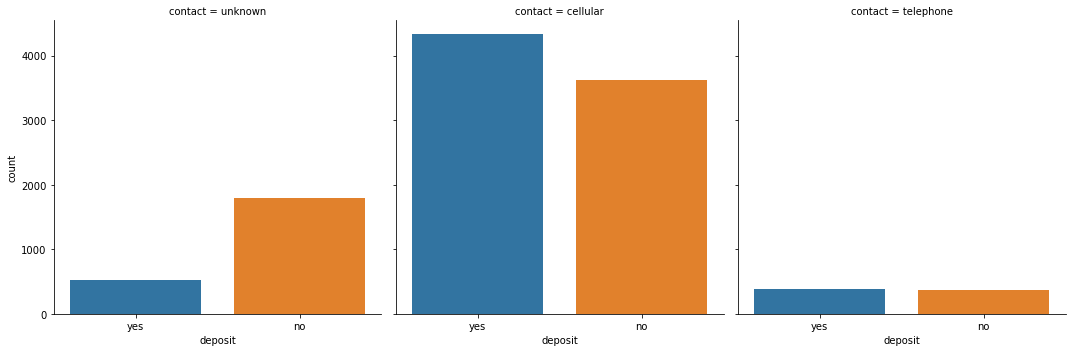

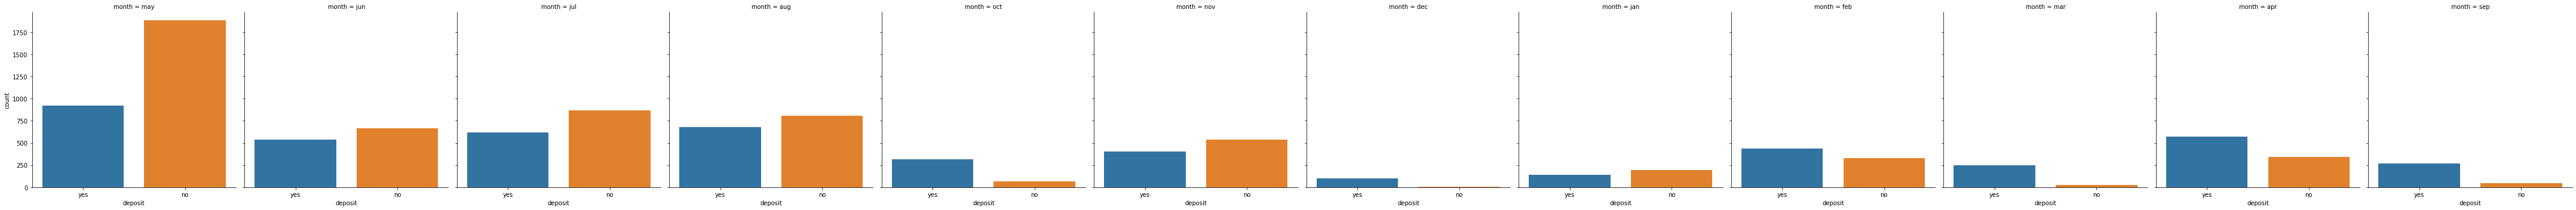

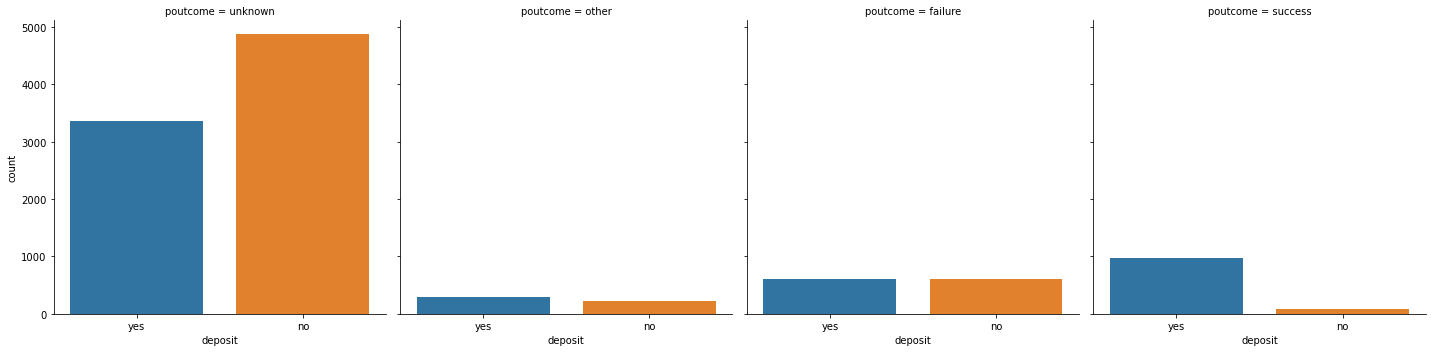

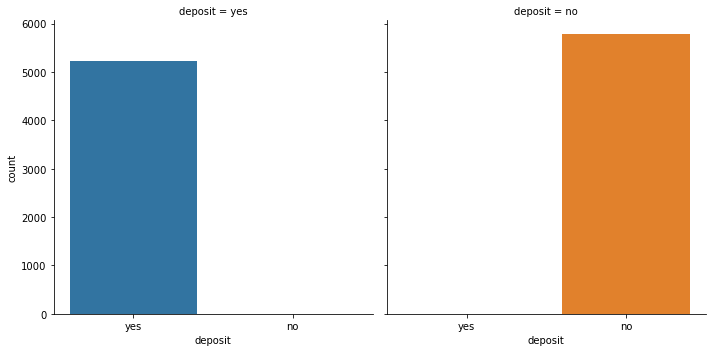

In [38]:

for j in categorical_coln:
    sns.catplot(x='deposit',col=j, kind='count', data=Bank)
plt.show()

In [39]:
for j in categorical_coln:
    print(Bank.groupby(['deposit',j]).size())
    print('-------------')

deposit  job          
no       admin.            693
         blue-collar      1221
         entrepreneur      205
         housemaid         164
         management       1252
         retired           261
         self-employed     214
         services          548
         student            89
         technician        976
         unemployed        155
yes      admin.            628
         blue-collar       707
         entrepreneur      119
         housemaid         107
         management       1298
         retired           515
         self-employed     186
         services          367
         student           267
         technician        840
         unemployed        201
dtype: int64
-------------
deposit  marital 
no       divorced     660
         married     3535
         single      1583
yes      divorced     618
         married     2728
         single      1889
dtype: int64
-------------
deposit  education
no       primary       902
         secondary   

- From the above graph and details,Default(credit), Marital column can be removed as it is not making difference in term deposit.

In [40]:
Bank.drop(['default'],axis=1,inplace= True)
Bank

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,single,primary,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39.0,services,married,secondary,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32.0,technician,single,secondary,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43.0,technician,married,secondary,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [41]:
Bank.drop(['marital'],axis=1,inplace= True)
Bank

,age,job,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,secondary,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,tertiary,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,primary,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39.0,services,secondary,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32.0,technician,secondary,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43.0,technician,secondary,0,no,yes,cellular,8,may,9,2,172,5,failure,no


DISTRIBUTION PLOTS FOR NUMRICAL COLUMNS:



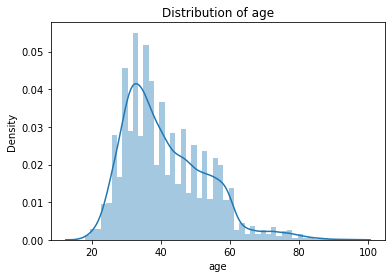

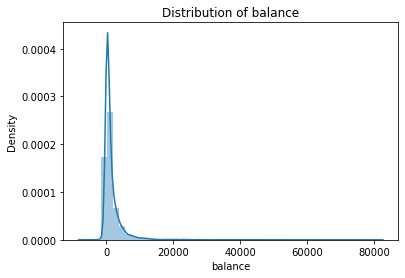

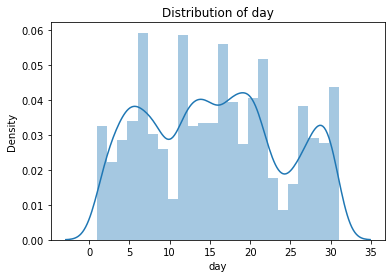

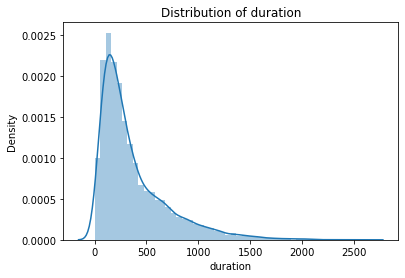

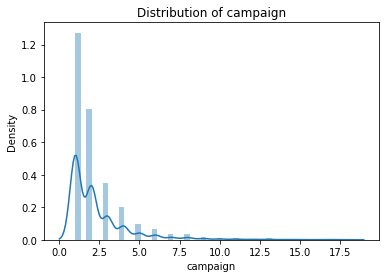

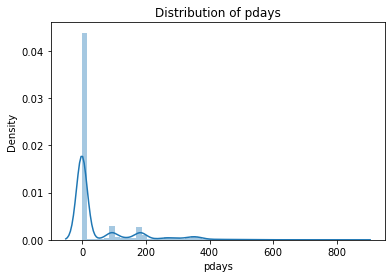

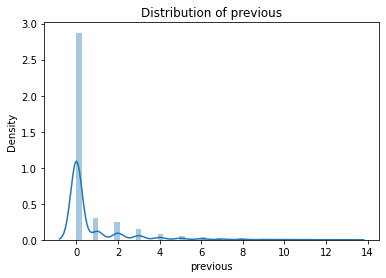

In [42]:


print("DISTRIBUTION PLOTS FOR NUMRICAL COLUMNS:\n")
for i in numerical_coln:
    sns.distplot(Bank[i])
    plt.title(f'Distribution of {i}')
    plt.show()

- Days can be removed as last contact month is provided 

In [43]:
Bank.drop(['day'],axis=1,inplace= True)

In [44]:
Bank.head()

,age,job,education,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,secondary,2343,yes,no,unknown,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,secondary,45,no,no,unknown,may,1467,1,-1,0,unknown,yes
2,41.0,technician,secondary,1270,yes,no,unknown,may,1389,1,-1,0,unknown,yes
3,55.0,services,secondary,2476,yes,no,unknown,may,579,1,-1,0,unknown,yes
4,54.0,admin.,tertiary,184,no,no,unknown,may,673,2,-1,0,unknown,yes


In [45]:
Bank['pdays'].value_counts(normalize=True)

-1      0.747117
 92     0.009443
 182    0.008081
 91     0.007537
 181    0.007264
          ...   
 44     0.000091
 29     0.000091
 761    0.000091
 31     0.000091
 118    0.000091
Name: pdays, Length: 468, dtype: float64

- pdays have around 75% of the value as -1. which has no significant meaning. Therefore we can drop the column

In [46]:
Bank.drop(['pdays'],axis=1,inplace= True)
Bank

,age,job,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,deposit
0,59.0,admin.,secondary,2343,yes,no,unknown,may,1042,1,0,unknown,yes
1,56.0,admin.,secondary,45,no,no,unknown,may,1467,1,0,unknown,yes
2,41.0,technician,secondary,1270,yes,no,unknown,may,1389,1,0,unknown,yes
3,55.0,services,secondary,2476,yes,no,unknown,may,579,1,0,unknown,yes
4,54.0,admin.,tertiary,184,no,no,unknown,may,673,2,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,blue-collar,primary,1,yes,no,cellular,apr,257,1,0,unknown,no
11158,39.0,services,secondary,733,no,no,unknown,jun,83,4,0,unknown,no
11159,32.0,technician,secondary,29,no,no,cellular,aug,156,2,0,unknown,no
11160,43.0,technician,secondary,0,no,yes,cellular,may,9,2,5,failure,no


# Encoding

In [47]:
#label encoding

#label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
binary_features= ['job']   

for i in binary_features:
    label_encoders[i] = LabelEncoder()
    Bank[i] = label_encoders[i].fit_transform(Bank[i]) 
    print(Bank[i].value_counts())


4     2550
1     1928
9     1816
0     1321
7      915
5      776
6      400
10     356
8      356
2      324
3      271
Name: job, dtype: int64


In [48]:
#label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
binary_features= ['education']   

for i in binary_features:
    label_encoders[i] = LabelEncoder()
    Bank[i] = label_encoders[i].fit_transform(Bank[i]) 
    print(Bank[i].value_counts())

    


1    5775
2    3747
0    1491
Name: education, dtype: int64


In [49]:
#label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
binary_features= ['contact']   

for i in binary_features:
    label_encoders[i] = LabelEncoder()
    Bank[i] = label_encoders[i].fit_transform(Bank[i]) 
    print(Bank[i].value_counts())


0    7944
2    2318
1     751
Name: contact, dtype: int64


In [50]:
#label encoding
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
binary_features= ['poutcome']   

for i in binary_features:
    label_encoders[i] = LabelEncoder()
    Bank[i] = label_encoders[i].fit_transform(Bank[i]) 
    print(Bank[i].value_counts())


3    8230
0    1209
2    1060
1     514
Name: poutcome, dtype: int64


<AxesSubplot:xlabel='deposit', ylabel='count'>

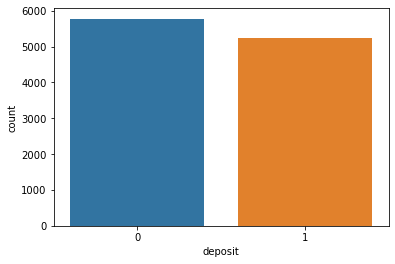

In [51]:
# using simple mapping on binary features.
Bank['deposit'] = Bank['deposit'].apply(lambda x: 1 if x =='yes' else (0 if x =='no' else None))
sns.countplot(Bank['deposit'])


In [52]:
label_encoding = {
    "month":{"jan":0,"feb":1,"mar":2,"apr":3,"may":4,"jun":5,"jul":6,"aug":7,"sep":8,"oct":9,"nov":10,"dec":11},
    "loan":{"no":0,"yes":1},
    "housing":{"no":0,"yes":1},
}

In [53]:
Bank = Bank.replace(label_encoding)

In [54]:
Bank

,age,job,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,deposit
0,59.0,0,1,2343,1,0,2,4,1042,1,0,3,1
1,56.0,0,1,45,0,0,2,4,1467,1,0,3,1
2,41.0,9,1,1270,1,0,2,4,1389,1,0,3,1
3,55.0,7,1,2476,1,0,2,4,579,1,0,3,1
4,54.0,0,2,184,0,0,2,4,673,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33.0,1,0,1,1,0,0,3,257,1,0,3,0
11158,39.0,7,1,733,0,0,2,5,83,4,0,3,0
11159,32.0,9,1,29,0,0,0,7,156,2,0,3,0
11160,43.0,9,1,0,0,1,0,4,9,2,5,0,0


# EDA

## Univariate Analysis

In [55]:
Bank.describe()

,age,job,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,deposit
count,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000
mean,41.219249,4.451648,1.204849,1528.493417,0.473440,0.130210,0.489149,5.191047,370.667847,2.393535,0.751657,2.481068,0.475347
std,11.909705,3.193873,0.658556,3227.217050,0.499317,0.336549,0.819085,2.573405,335.836379,2.139403,1.753254,1.000876,0.499415
min,18.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,123.000000,0.000000,0.000000,0.000000,4.000000,139.000000,1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,550.000000,0.000000,0.000000,0.000000,5.000000,256.000000,2.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,1712.000000,1.000000,0.000000,1.000000,7.000000,497.000000,3.000000,1.000000,3.000000,1.000000
max,95.000000,10.000000,2.000000,81204.000000,1.000000,1.000000,2.000000,11.000000,2621.000000,18.000000,13.000000,3.000000,1.000000


In [56]:
# Split the categorical and continuos features
categorical_coln = Bank.select_dtypes('object')
numerical_coln = Bank.select_dtypes('number')

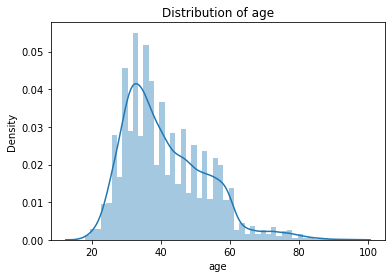

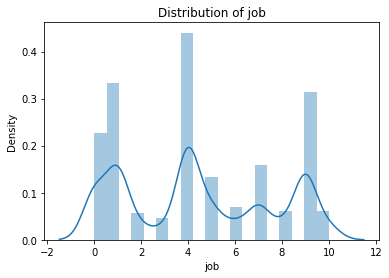

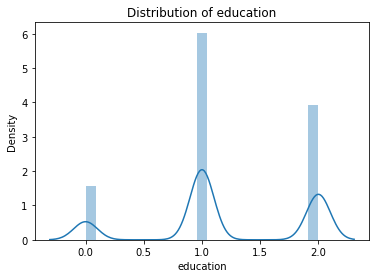

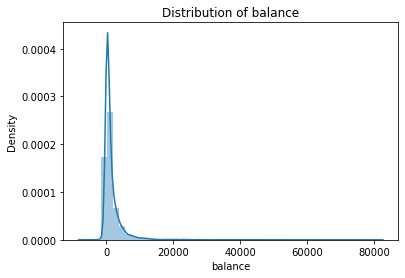

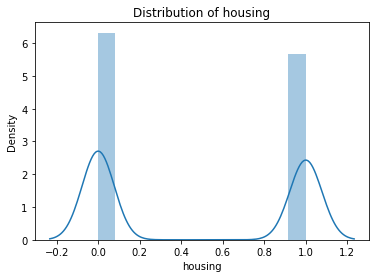

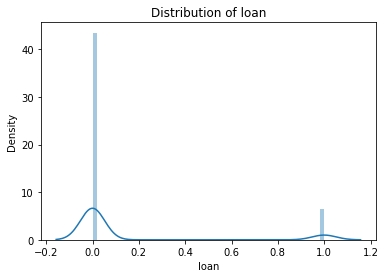

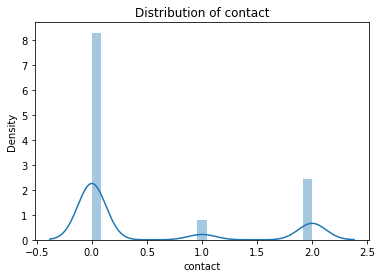

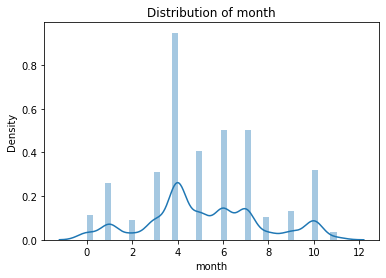

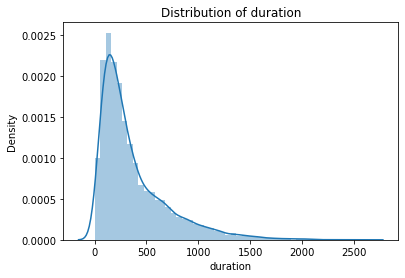

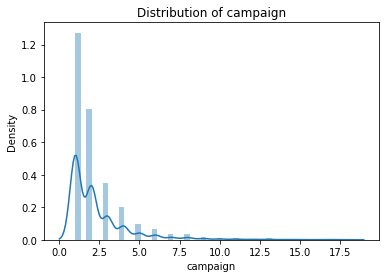

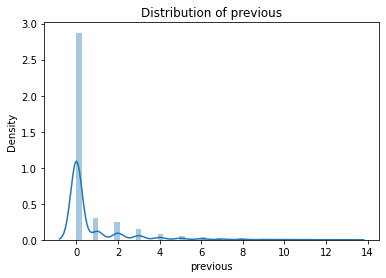

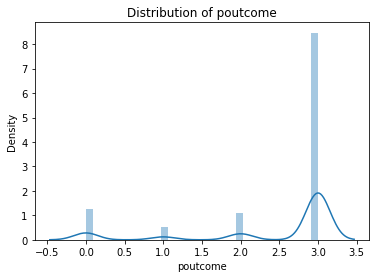

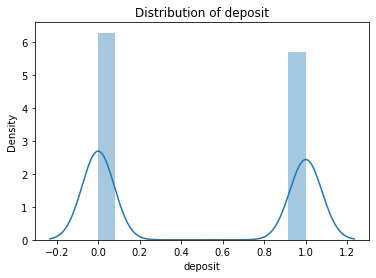

In [57]:
for i in numerical_coln:
    sns.distplot(Bank[i])
    plt.title(f'Distribution of {i}')
    plt.show()

## Bivariate Analysis

<Figure size 1440x2880 with 0 Axes>

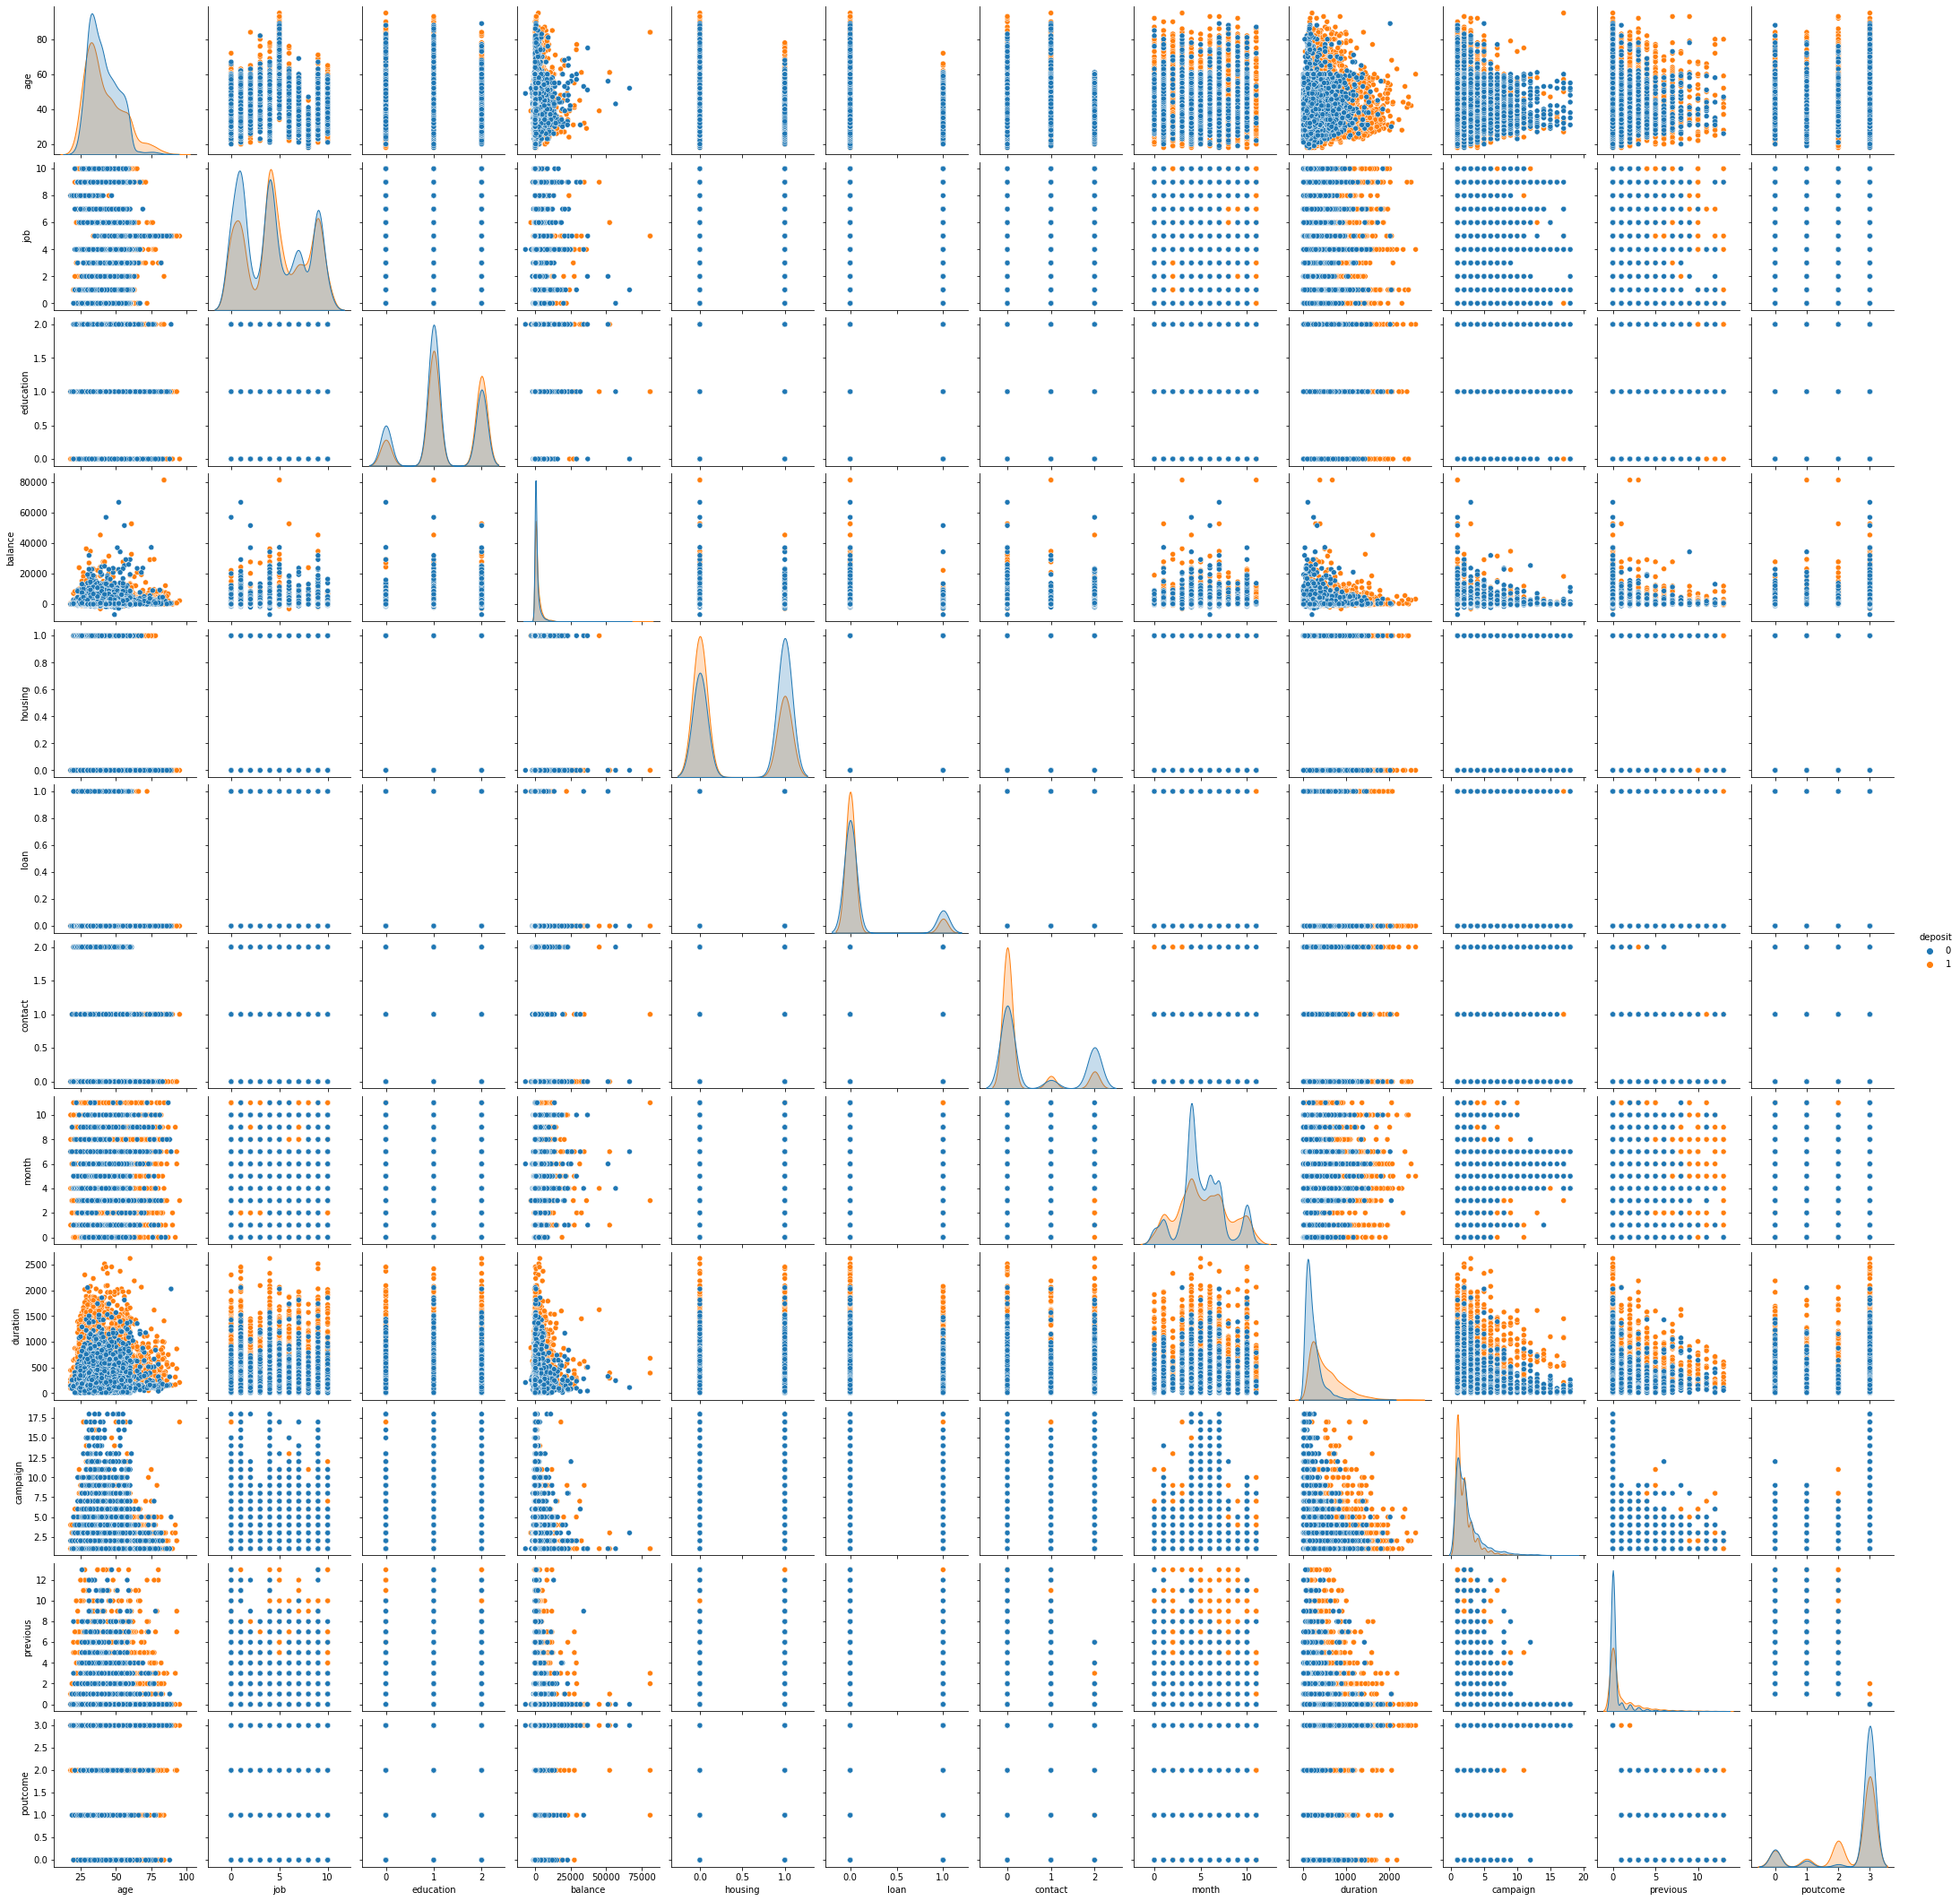

In [58]:
plt.figure(figsize=[20,40])

sns.pairplot(Bank,hue='deposit')

In [59]:
Bank.corr()

,age,job,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,deposit
age,1.000000,-0.037774,-0.185083,0.111255,-0.168731,-0.030908,0.025318,0.070092,0.000582,-0.001389,0.038645,-0.004357,0.034541
job,-0.037774,1.000000,0.142694,0.028104,-0.128685,-0.065868,-0.088379,0.021376,0.007327,0.004553,0.017097,-0.005734,0.063742
education,-0.185083,0.142694,1.000000,0.052334,-0.092813,-0.056851,-0.160356,0.042331,-0.011816,-0.017004,0.053581,-0.052255,0.103711
balance,0.111255,0.028104,0.052334,1.000000,-0.075912,-0.083701,-0.027929,0.063238,0.024562,-0.014737,0.037905,-0.027933,0.080808
housing,-0.168731,-0.128685,-0.092813,-0.075912,1.000000,0.074621,0.228162,-0.117395,0.035654,-0.006876,-0.020865,-0.043481,-0.205556
loan,-0.030908,-0.065868,-0.056851,-0.083701,0.074621,1.000000,0.005785,0.006190,-0.006601,0.026949,-0.046151,0.027269,-0.111109
contact,0.025318,-0.088379,-0.160356,-0.027929,0.228162,0.005785,1.000000,-0.129038,-0.023267,0.056954,-0.207170,0.257263,-0.251231
month,0.070092,0.021376,0.042331,0.063238,-0.117395,0.006190,-0.129038,1.000000,0.008386,0.044089,0.008383,0.013991,0.028749
duration,0.000582,0.007327,-0.011816,0.024562,0.035654,-0.006601,-0.023267,0.008386,1.000000,-0.018824,-0.028734,0.041191,0.458029
campaign,-0.001389,0.004553,-0.017004,-0.014737,-0.006876,0.026949,0.056954,0.044089,-0.018824,1.000000,-0.072962,0.119300,-0.122912


<AxesSubplot:>

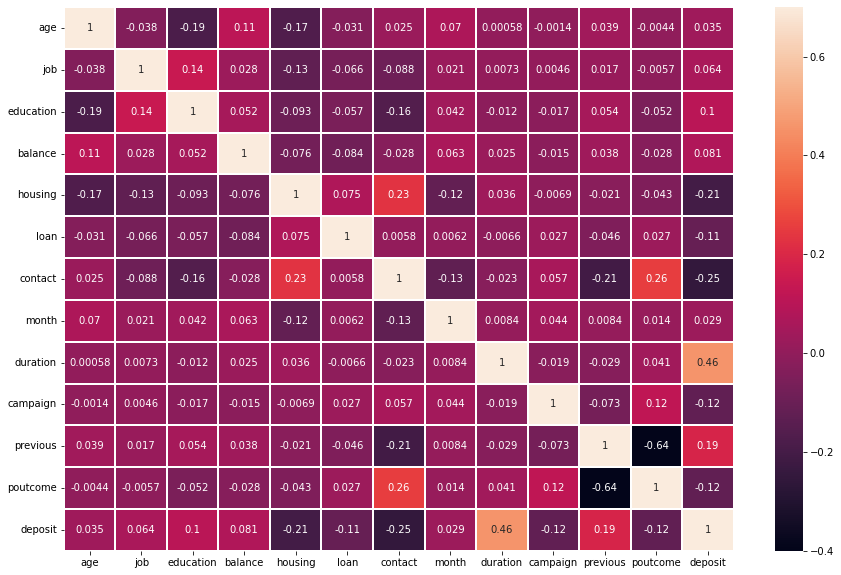

In [60]:
corrmatrix=Bank.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corrmatrix,vmin= -0.4,vmax=.7,annot=True,linewidth=0.3)

## Standardisation/Normalisation 

In [61]:
from sklearn import preprocessing

In [62]:
Bank.describe()

,age,job,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,deposit
count,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000
mean,41.219249,4.451648,1.204849,1528.493417,0.473440,0.130210,0.489149,5.191047,370.667847,2.393535,0.751657,2.481068,0.475347
std,11.909705,3.193873,0.658556,3227.217050,0.499317,0.336549,0.819085,2.573405,335.836379,2.139403,1.753254,1.000876,0.499415
min,18.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,123.000000,0.000000,0.000000,0.000000,4.000000,139.000000,1.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,550.000000,0.000000,0.000000,0.000000,5.000000,256.000000,2.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,1712.000000,1.000000,0.000000,1.000000,7.000000,497.000000,3.000000,1.000000,3.000000,1.000000
max,95.000000,10.000000,2.000000,81204.000000,1.000000,1.000000,2.000000,11.000000,2621.000000,18.000000,13.000000,3.000000,1.000000


In [63]:


num_coln=['age', 'balance', 'duration',
    'campaign',  'previous','job','education','contact','month','poutcome']

In [64]:
scaler =preprocessing. MinMaxScaler(feature_range=(0, 1))

Bank[num_coln] = scaler.fit_transform(Bank[num_coln])

In [65]:
df2 = Bank[num_coln]
df2.describe()

,age,balance,duration,campaign,previous,job,education,contact,month,poutcome
count,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000
mean,0.301549,0.095121,0.140767,0.081973,0.057820,0.445165,0.602424,0.244575,0.471913,0.827023
std,0.154671,0.036652,0.128231,0.125847,0.134866,0.319387,0.329278,0.409542,0.233946,0.333625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.079159,0.052310,0.000000,0.000000,0.100000,0.500000,0.000000,0.363636,0.666667
50%,0.272727,0.084008,0.096984,0.058824,0.000000,0.400000,0.500000,0.000000,0.454545,1.000000
75%,0.402597,0.097205,0.189003,0.117647,0.076923,0.700000,1.000000,0.500000,0.636364,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
Bank.describe()

,age,job,education,balance,housing,loan,contact,month,duration,campaign,previous,poutcome,deposit
count,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000,11013.000000
mean,0.301549,0.445165,0.602424,0.095121,0.473440,0.130210,0.244575,0.471913,0.140767,0.081973,0.057820,0.827023,0.475347
std,0.154671,0.319387,0.329278,0.036652,0.499317,0.336549,0.409542,0.233946,0.128231,0.125847,0.134866,0.333625,0.499415
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.100000,0.500000,0.079159,0.000000,0.000000,0.000000,0.363636,0.052310,0.000000,0.000000,0.666667,0.000000
50%,0.272727,0.400000,0.500000,0.084008,0.000000,0.000000,0.000000,0.454545,0.096984,0.058824,0.000000,1.000000,0.000000
75%,0.402597,0.700000,1.000000,0.097205,1.000000,0.000000,0.500000,0.636364,0.189003,0.117647,0.076923,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modelling

In [67]:
y=Bank['deposit']
X=Bank.drop('deposit',axis=1)

In [68]:
#spliting of data
from  sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [69]:
X_train.shape

(8810, 12)

## Logistic Regression

In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
from sklearn.linear_model import LogisticRegression
logit_model =LogisticRegression( C=5)
logit_model.fit(X_train,y_train)
y_pre=logit_model.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,plot_confusion_matrix
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'macro'))
print("Precision score :",precision_score(y_test,y_pre,average='macro'))
print("Recall_score :",recall_score(y_test,y_pre,average='macro'))

Accuracy is: 0.7925556059918293
f1_score is: 0.7923337854074597
Precision score : 0.792528741325593
Recall_score : 0.7922334492876971


In [73]:
confusion_matrix(y_test, y_pre)

array([[909, 220],
       [237, 837]], dtype=int64)

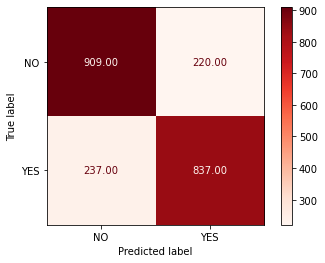

In [74]:
plot_confusion_matrix(logit_model,X_test,y_test,display_labels =["NO","YES"],cmap = plt.cm.Reds, values_format = '.2f')

## KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    Classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    Classifier.fit(X_train,y_train)
    y_pre=Classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pre)
    acc_values.append(acc)

In [76]:
acc_values

[0.7680435769405356,
 0.7557875624148888,
 0.784384929641398,
 0.7712210621879255,
 0.793463458919655,
 0.7807535179300953,
 0.790285973672265,
 0.7857467090331366,
 0.7916477530640036,
 0.7821152973218338,
 0.7916477530640036,
 0.7880163413527008]

Text(0, 0.5, 'acccuracy')

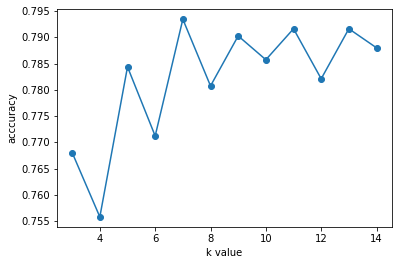

In [77]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('acccuracy')

In [78]:
Classifier = KNeighborsClassifier(n_neighbors=11,metric='minkowski')
Classifier.fit(X_train,y_train)
y_pre=Classifier.predict(X_test)


In [79]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'macro'))
print("Precision score :",precision_score(y_test,y_pre,average='macro'))
print("Recall_score :",recall_score(y_test,y_pre,average='macro'))

Accuracy is: 0.7916477530640036
f1_score is: 0.7914825961749632
Precision score : 0.7915427782251145
Recall_score : 0.7914384279029414


In [80]:
confusion_matrix(y_test, y_pre)

array([[903, 226],
       [233, 841]], dtype=int64)

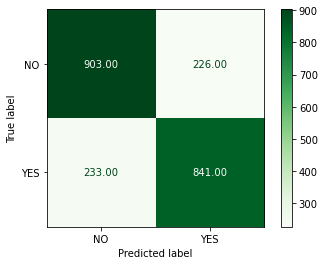

In [81]:
plot_confusion_matrix(Classifier,X_test,y_test,display_labels =["NO","YES"],cmap = plt.cm.Greens, values_format = '.2f')

## Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 50, random_state = 0)
RF.fit(X_train, y_train)
y_pre = RF.predict(X_test)

In [83]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'macro'))
print("Precision score :",precision_score(y_test,y_pre,average='macro'))
print("Recall_score :",recall_score(y_test,y_pre,average='macro'))

Accuracy is: 0.8311393554244212
f1_score is: 0.8311393206308075
Precision score : 0.8316316180108857
Recall_score : 0.8316463870236676


In [84]:
confusion_matrix(y_test, y_pre)

array([[916, 213],
       [159, 915]], dtype=int64)

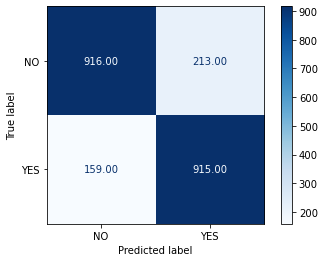

In [85]:
plot_confusion_matrix(RF,X_test,y_test,display_labels =["NO","YES"],cmap = plt.cm.Blues, values_format = '.2f')

## Kernal SVM

In [86]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf',C=1,gamma='auto', random_state = 0)
svm.fit(X_train, y_train)
y_pre = svm.predict(X_test)

In [87]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'macro'))
print("Precision score :",precision_score(y_test,y_pre,average='macro'))
print("Recall_score :",recall_score(y_test,y_pre,average='macro'))

Accuracy is: 0.8107126645483431
f1_score is: 0.8107050197475258
Precision score : 0.8116253157034616
Recall_score : 0.8113770529118071


In [88]:
confusion_matrix(y_test, y_pre)

array([[886, 243],
       [174, 900]], dtype=int64)

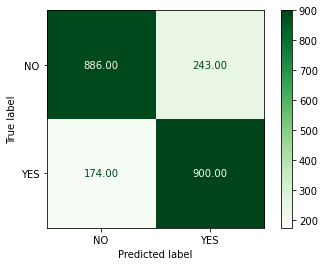

In [89]:
plot_confusion_matrix(svm,X_test,y_test,display_labels =["NO","YES"],cmap = plt.cm.Greens, values_format = '.2f')

## DecisionTreeClassifier

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion= 'entropy')
dt_model.fit(X_train,y_train)
y_pre=dt_model.predict(X_test)

In [91]:
print('Accuracy is:', accuracy_score(y_test, y_pre))
print('f1_score is:', f1_score(y_test, y_pre, average = 'macro'))
print("Precision score :",precision_score(y_test,y_pre,average='macro'))
print("Recall_score :",recall_score(y_test,y_pre,average='macro'))

Accuracy is: 0.7684975034044484
f1_score is: 0.7683424193189222
Precision score : 0.7683556686065693
Recall_score : 0.7683304385977934


In [92]:
confusion_matrix(y_test, y_pre)

array([[875, 254],
       [256, 818]], dtype=int64)

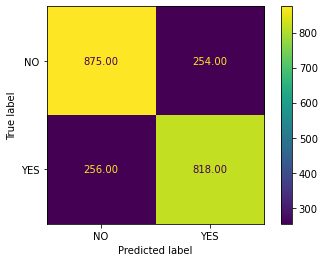

In [93]:
plot_confusion_matrix(dt_model,X_test,y_test,display_labels =["NO","YES"], values_format = '.2f')

# Hyperparameter tuning

In [94]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier( criterion = 'entropy', random_state = 0),
        'params' : {
            'n_estimators': [10,30,50],
             'criterion': ['gini','entropy']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy']
            
        }
    },
    'K-Mean':{
        'model': KNeighborsClassifier(metric='minkowski'),
        'params':{
            'n_neighbors':[7,11,13]
        }
    }
}

In [95]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'],scoring='accuracy', cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    y_pre=clf.predict(X_test)
    accuracy_score(y_test, y_pre)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.823156,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.838252,"{'criterion': 'gini', 'n_estimators': 50}"
2,logistic_regression,0.794325,{'C': 5}
3,decision_tree,0.780704,{'criterion': 'entropy'}
4,K-Mean,0.798751,{'n_neighbors': 11}


In [96]:
dfnew = pd.DataFrame()
dfnew['Model'] = ['DescisionTree','LogisticRegression','KNeighborsClassifier','RandomForestClassifier','SVM']
dfnew['Accuracy'] = [0.7743985474353154,0.7925556059918293,0.7916477530640036,0.8311393554244212,0.8107126645483431]
dfnew['Precision']=[0.7742631799480688,0.792528741325593,0.7915427782251145,0.8316316180108857,0.8116253157034616]
dfnew['Recall']=[0.7742238232611381,0.7922334492876971,0.7914384279029414,0.8316463870236676,0.8113770529118071]
dfnew['f1_Score']=[0.7742420634061501,0.7923337854074597,0.7914825961749632,0.8311393206308075,0.8107050197475258]
dfnew

,Model,Accuracy,Precision,Recall,f1_Score
0,DescisionTree,0.774399,0.774263,0.774224,0.774242
1,LogisticRegression,0.792556,0.792529,0.792233,0.792334
2,KNeighborsClassifier,0.791648,0.791543,0.791438,0.791483
3,RandomForestClassifier,0.831139,0.831632,0.831646,0.831139
4,SVM,0.810713,0.811625,0.811377,0.810705


In [97]:
model = sns.light_palette('seagreen',as_cmap=True)
m = dfnew.style.background_gradient(cmap=model)
m

,Model,Accuracy,Precision,Recall,f1_Score
0,DescisionTree,0.774399,0.774263,0.774224,0.774242
1,LogisticRegression,0.792556,0.792529,0.792233,0.792334
2,KNeighborsClassifier,0.791648,0.791543,0.791438,0.791483
3,RandomForestClassifier,0.831139,0.831632,0.831646,0.831139
4,SVM,0.810713,0.811625,0.811377,0.810705


 RandomForestClassifier Model is the best model with 83% of accuracy

Bank Marketing dataset was 16 feature variable and 1 feature variable. By doing the Data-preprocessing and EDA, we have cleaned and reduced the dataset to fit in the model. After the pre-processing,we have applied different classification algorithm. Out of all the model we have created, RandomForestClassifier Model has the best accuracy with 83%. 
